<a href="https://colab.research.google.com/github/Annie-freitas/HeartDisease-App/blob/main/DSN_hackaton_Health_Disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING MODELS

In [1]:
pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

IMPORTING DATASET

In [5]:
# Importing datasets
train_data = pd.read_csv("/content/Share Train Dataset .csv")
test_data = pd.read_csv("/content/Share Test Dataset.csv")

DATA PREPROCESSING

In [6]:
# Viewing the first few rows of the datasets
print(train_data.head())
print(test_data.head())

      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
      id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37  

In [7]:
# Viewing the last few rows of the datasets
print(train_data.tail())
print(test_data.tail())

         Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
7298  19401   30    1   2       107   177    1        2      119      0   
7299  10446   42    1   2        96   551    1        2       76      0   
7300  13219   51    1   0       151   165    1        0      190      1   
7301  15349   29    0   0       195   287    1        2      161      1   
7302  15363   38    0   0       193   487    0        1      154      1   

      oldpeak  slope  ca  thal  target  
7298      2.7      1   0     0       0  
7299      1.9      2   3     2       1  
7300      0.9      0   0     2       1  
7301      3.4      1   1     0       1  
7302      4.8      1   4     3       1  
         id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
2692  14964   34    0   3       136   291    0        1      163      0   
2693  16774   72    0   1       104   166    1        2       95      1   
2694  18884   31    1   0       153   457    1        1      170      1   
269

In [8]:
# Describing the dataset
print(train_data.describe())
print(test_data.describe())

                 Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000

In [9]:
# Getting the information of the datasets
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

In [10]:
# Viewing the shape of the datasets
print(train_data.shape)
print(test_data.shape)

(7303, 15)
(2697, 14)


In [11]:
# Viewing the size of the dataset
print(train_data.size)
print(test_data.size)

109545
37758


EXPLORATORY DATA ANALYSIS

In [12]:
# Looking out for duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [13]:
# Looking out for nulls
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


EXPLORATORY DATA ANALYSIS VISUALIZATION

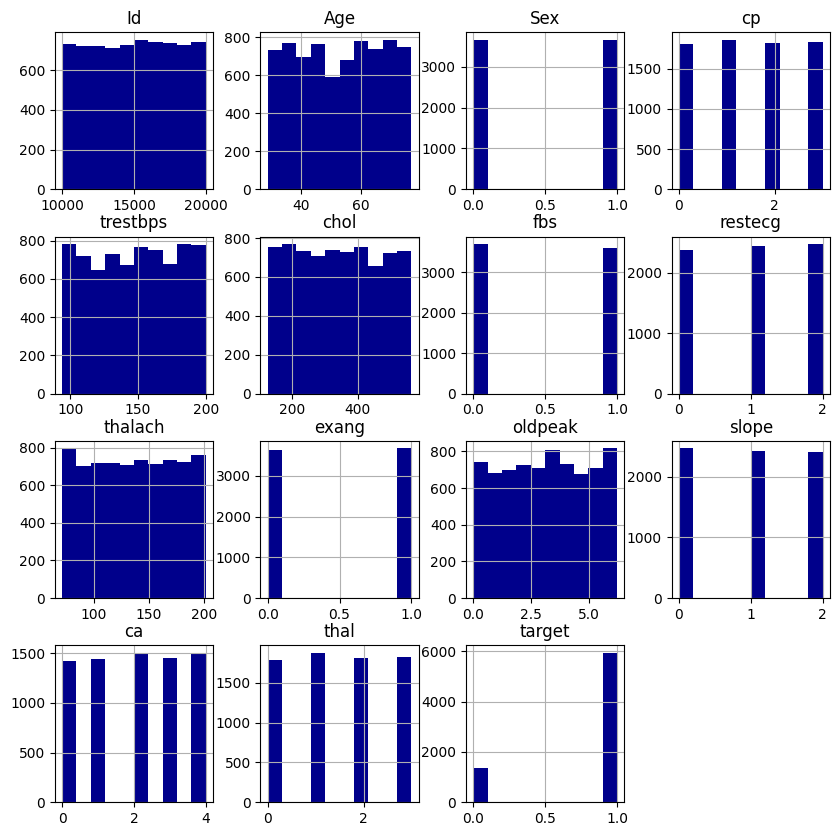

In [14]:
# Visualizing features and target
train_data.hist(figsize = (10, 10), color = "darkblue")
plt.show()

In [15]:
# Correlation Matrix
correlation_matrix = train_data.corr()
correlation_matrix

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
Age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
Sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


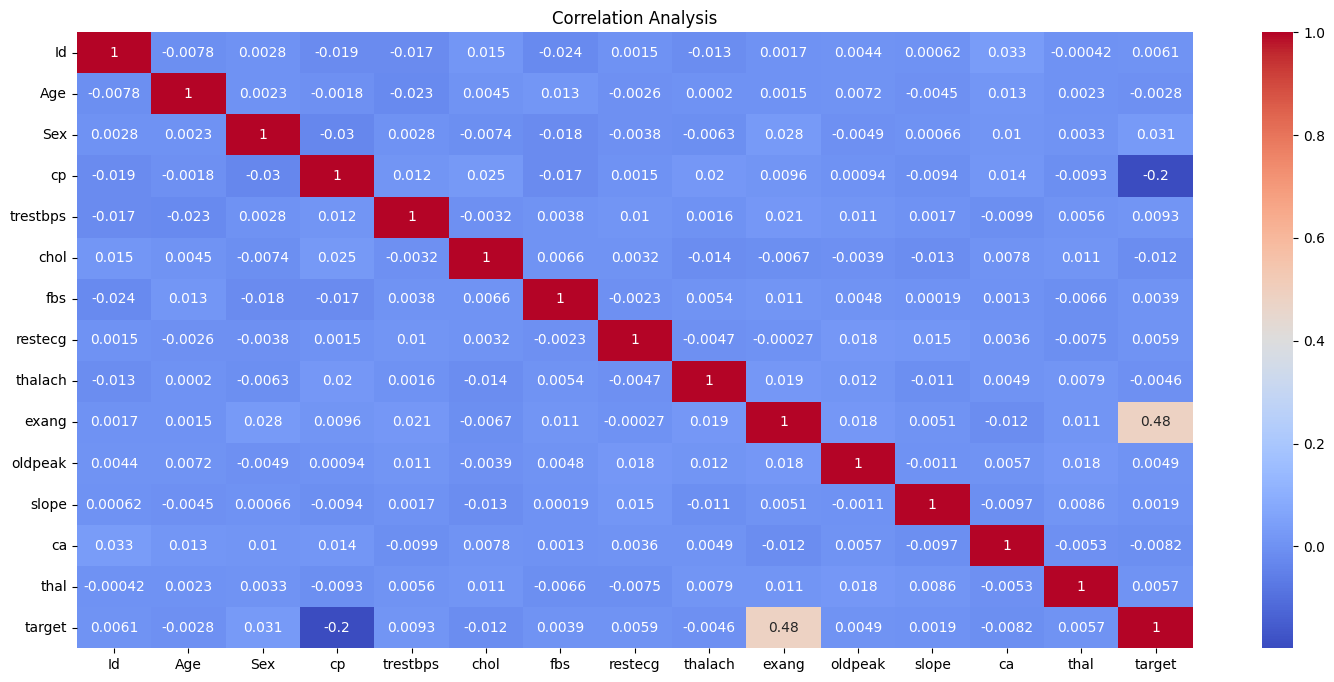

In [16]:
# Visualizing Correlation Analysis
plt.figure(figsize=(18,8))
sns.heatmap(train_data.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

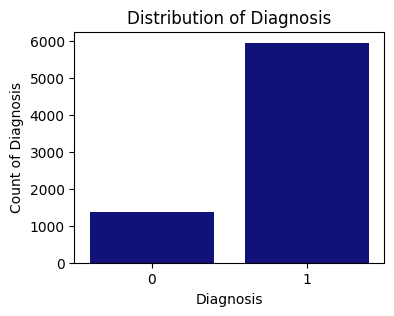

In [17]:
# Visualizing the Distribution of Diagnosis
plt.figure(figsize=(4,3))
sns.countplot(x='target',data=train_data, color = "darkblue")
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count of Diagnosis')
plt.show()

FEATURE ENGINEERING

In [18]:
# Creating age categories
train_data['age_category'] = pd.cut(train_data["Age"], bins= [29, 39, 49, 59, 69, 79], labels= ['30-39', '40-49', '50-59', '60-69', '70-79'], right=False)
test_data['age_category'] = pd.cut(test_data["age"], bins= [29, 39, 49, 59, 69, 79], labels= ['30-39', '40-49', '50-59', '60-69', '70-79'], right=False)

In [19]:
# Creating cholesterol levels as categories
train_data['cholesterol_category'] = pd.cut(train_data['chol'], bins=[0, 200, 240, 600], labels=['Low', 'Medium', 'High'])
test_data['cholesterol_category'] = pd.cut(test_data['chol'], bins=[0, 200, 240, 600], labels=['Low', 'Medium', 'High'])

In [22]:
#Import the LabelEncoder class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder


In [23]:
#Standardizing the train data
label_encoder = LabelEncoder()
train_data['cholesterol_category'] = label_encoder.fit_transform(train_data['cholesterol_category'])
train_data['age_category'] = label_encoder.fit_transform(train_data['age_category'])

# Standardizing the test data
test_data['cholesterol_category'] = label_encoder.fit_transform(test_data['cholesterol_category'])
test_data['age_category'] = label_encoder.fit_transform(test_data['age_category'])

In [24]:
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_test = test_data

In [25]:
# Ensure the feature names in X_test match those used during training

X_test = X_test.rename(columns={'age': 'Age', 'id': 'Id', 'sex': 'Sex'})

SELECTING IMPORTANT FEATURES

In [28]:
# import the necessary module and class
from sklearn.feature_selection import RFE



In [30]:
# Calling Random forest model
model = RandomForestClassifier(random_state = 0)

In [31]:
# Calling Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=5)

In [32]:
# Fitting Recursive Feature Elimination
fit = rfe.fit(X_train, y_train)

In [33]:
# Selecting Features
features = X_train.columns[fit.support_]
features

Index(['Id', 'cp', 'chol', 'thalach', 'exang'], dtype='object')

MODEL BUILDING AND TRAINING

In [52]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier # import VotingClassifier class
from sklearn.model_selection import cross_val_score



In [39]:
# Calling the models
model1 = LogisticRegression(max_iter = 1000)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [43]:
# # Combine models in VotingClassifier
model5 = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('rf', model3),
    ('xgb', model4)
], voting='soft')

In [44]:
# Fiting logistic regression
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:
#Fiting decision tree
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Fiting random forest
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Fitting XGBoost model
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:07:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [48]:
model5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

PREDICTING Y ON TEST

In [49]:
#Convert column names in X_test to match the case of column names used during training
X_test.columns = X_train.columns

In [50]:
# Predicting y_test
y_test_pred1 = model1.predict(X_test)
y_test_pred2 = model2.predict(X_test)
y_test_pred3 = model3.predict(X_test)
y_test_pred4 = model4.predict(X_test)
y_test_pred5 = model5.predict(X_test)

CROSS VALIDATION

In [53]:
# Cross validation of logistic regression
cross1 = cross_val_score(model1, X_train, y_train, cv=5)
cross1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.80492813, 0.81861739, 0.80424367, 0.81849315, 0.81232877])

In [54]:
# Cross validation of Decision Tree
cross2 = cross_val_score(model2, X_train, y_train, cv=5)
cross2

array([0.81040383, 0.83093771, 0.80150582, 0.81575342, 0.81643836])

In [55]:
# Cross validation of Random Forest
cross3 = cross_val_score(model3, X_train, y_train, cv=5)
cross3

array([0.80629706, 0.80835044, 0.80355921, 0.81027397, 0.80821918])

In [56]:
# Cross validation of XGBClassifier
cross4 = cross_val_score(model4, X_train, y_train, cv=5)
cross4

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

array([0.80629706, 0.80698152, 0.8110883 , 0.81780822, 0.81506849])

In [57]:
# Cross validation of Ensemble
cross5 = cross_val_score(model5, X_train, y_train, cv=5)
cross5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

array([0.80903491, 0.82614648, 0.80150582, 0.80890411, 0.81780822])

MODEL PREDICTIONS

In [58]:
# Predicting  logistic regression
pred_lr = model1.predict(X_test)
pred_lr

array([1, 1, 1, ..., 1, 1, 0])

In [59]:
# Predicting  Decision Tree
pred_dtc = model2.predict(X_test)
pred_dtc

array([1, 1, 1, ..., 1, 1, 0])

In [60]:
# Predicting  Random Forest
pred_rfc = model3.predict(X_test)
pred_rfc

array([1, 1, 1, ..., 1, 1, 0])

In [61]:
# Predicting  XGBClassifier
pred_xgb = model4.predict(X_test)
pred_xgb

array([1, 1, 1, ..., 1, 1, 0])

In [62]:
# Predicting  Ensemble
pred_ens = model5.predict(X_test)
pred_ens

array([1, 1, 1, ..., 1, 1, 0])

MODEL EVALUATION

In [63]:
# Model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test_pred1, pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test_pred2, pred_dtc))
print("Random Forest Accuracy:", accuracy_score(y_test_pred3, pred_rfc))
print("XGBClassifier Accuracy:", accuracy_score(y_test_pred4, pred_xgb))
print("Ensemble Accuracy:", accuracy_score(y_test_pred5, pred_ens))

Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
XGBClassifier Accuracy: 1.0
Ensemble Accuracy: 1.0


In [64]:
# Model evaluation
print("Logistic Regression classification_report:", accuracy_score(y_test_pred1, pred_lr))
print("Decision Tree classification_report:", classification_report(y_test_pred2, pred_dtc))
print("Random Forest classification_report:", classification_report(y_test_pred3, pred_rfc))
print("XGBClassifier classification_report:", classification_report(y_test_pred4, pred_xgb))
print("Ensemble Accuracy:", classification_report(y_test_pred5, pred_ens))

Logistic Regression classification_report: 1.0
Decision Tree classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      2697
   macro avg       1.00      1.00      1.00      2697
weighted avg       1.00      1.00      1.00      2697

Random Forest classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00      2229

    accuracy                           1.00      2697
   macro avg       1.00      1.00      1.00      2697
weighted avg       1.00      1.00      1.00      2697

XGBClassifier classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00      2180

    accuracy            

In [69]:
import pickle

# Assume `model` is your trained model
filename = 'Heart_Disease_model.pkl'

In [73]:
 # Save the model
with open('Heart_Disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [71]:
# Load the model
with open('Heart_Disease_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [65]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [66]:
pip freeze > requirements.txt


In [67]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle  # or joblib
from sklearn.preprocessing import StandardScaler  # Replace with your scaler



In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print("scaler.pkl not found. Created a new StandardScaler.")

scaler.pkl not found. Created a new StandardScaler.


In [79]:
# Load the model and scaler
model = pickle.load(open('Heart_Disease_model.pkl', 'rb'))




In [80]:
st.title("Heart Disease Indicator")
st.write("Predict the likelihood of heart disease based on health indicators.")


2024-11-25 16:24:10.984 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:24:11.055 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-25 16:24:11.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:24:11.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:24:11.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:24:11.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:24:11.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [81]:
# Input features
age = st.number_input("Age", min_value=0, max_value=120, value=30)
sex = st.selectbox("Sex", options=["Male", "Female"])
cp = st.selectbox("Chest Pain Type (cp)", options=[0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", min_value=0, max_value=300, value=120)
chol = st.number_input("Cholesterol Level (chol)", min_value=0, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl (fbs)", options=[0, 1])
restecg = st.selectbox("Resting ECG Results (restecg)", options=[0, 1, 2])
thalach = st.number_input("Maximum Heart Rate Achieved (thalach)", min_value=0, max_value=250, value=150)
exang = st.selectbox("Exercise-Induced Angina (exang)", options=[0, 1])
oldpeak = st.number_input("ST Depression (oldpeak)", min_value=0.0, max_value=10.0, value=1.0, step=0.1)
slope = st.selectbox("Slope of Peak Exercise (slope)", options=[0, 1, 2])
ca = st.selectbox("Number of Major Vessels (ca)", options=[0, 1, 2, 3, 4])
thal = st.selectbox("Thalassemia (thal)", options=[0, 1, 2, 3])


2024-11-25 16:27:09.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.488 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.489 Session state does not function when running a script without `streamlit run`
2024-11-25 16:27:09.491 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:09.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27

In [82]:
# Map sex to binary
sex = 1 if sex == "Male" else 0



In [83]:
# Predict heart disease
if st.button("Predict"):
    features = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]).reshape(1, -1)
    prediction = model.predict(features)
    st.write("Heart Disease Likelihood: ", "Yes" if prediction[0] == 1 else "No")

2024-11-25 16:27:45.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:45.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:45.482 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:45.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-25 16:27:45.485 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [86]:
!streamlit run heart_disease_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: heart_disease_app.py
